In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving BTC-USD-6M.csv to BTC-USD-6M (1).csv


In [ ]:
# Store the data in a dataframe
df = pd.read_csv('BTC-USD-6M.csv')

# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-14,61221.132813,61597.917969,59302.316406,59302.316406,59302.316406,43901225564
1,2021-03-15,59267.429688,60540.992188,55393.164063,55907.199219,55907.199219,66419369890
2,2021-03-16,55840.785156,56833.179688,53555.027344,56804.902344,56804.902344,59749798599
3,2021-03-17,56825.828125,58969.816406,54528.628906,58870.894531,58870.894531,60258313191
4,2021-03-18,58893.078125,60116.250000,54253.578125,57858.921875,57858.921875,55746041000
...,...,...,...,...,...,...,...
180,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,39154666597
181,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245
182,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,27881980161
183,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,40969943253


In [ ]:
# Set the index to the date column
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-03-14,2021-03-14,61221.132813,61597.917969,59302.316406,59302.316406,59302.316406,43901225564
2021-03-15,2021-03-15,59267.429688,60540.992188,55393.164063,55907.199219,55907.199219,66419369890
2021-03-16,2021-03-16,55840.785156,56833.179688,53555.027344,56804.902344,56804.902344,59749798599
2021-03-17,2021-03-17,56825.828125,58969.816406,54528.628906,58870.894531,58870.894531,60258313191
2021-03-18,2021-03-18,58893.078125,60116.250000,54253.578125,57858.921875,57858.921875,55746041000
...,...,...,...,...,...,...,...
2021-09-10,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,39154666597
2021-09-11,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245
2021-09-12,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,27881980161
2021-09-13,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,40969943253


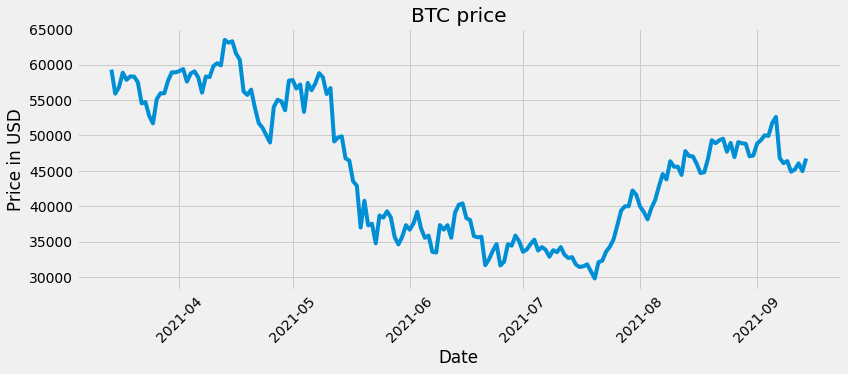

In [ ]:
# Plot the close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.xticks(rotation=45)
plt.title('BTC price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [ ]:
# Calculate Typical price
typical_price = (df['Close'] + df['High'] + df['Low'])/3
typical_price

2021-03-14    60067.516927
2021-03-15    57280.451823
2021-03-16    55731.036459
2021-03-17    57456.446614
2021-03-18    57409.583333
                  ...     
2021-09-10    45420.045573
2021-09-11    45329.671875
2021-09-12    45739.536458
2021-09-13    45051.024740
2021-09-14    46132.826823
Length: 185, dtype: float64

In [ ]:
# Get the period
period = 14

In [ ]:
# Calculate money flow
money_flow = typical_price * df['Volume']
money_flow

2021-03-14    2.637038e+15
2021-03-15    3.804532e+15
2021-03-16    3.329918e+15
2021-03-17    3.462229e+15
2021-03-18    3.200357e+15
                  ...     
2021-09-10    1.778407e+15
2021-09-11    1.563866e+15
2021-09-12    1.275309e+15
2021-09-13    1.845738e+15
2021-09-14    1.772192e+15
Length: 185, dtype: float64

In [ ]:
# Get all the positive and negative money flows
positive_flow = []
negative_flow = []

# Loop though the typical price
for i in range (1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)
    

In [ ]:
# get all of the positive and negative money flows within the time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append( sum(positive_flow[i + 1 - period : i+1]) )
for i in range(period-1, len(negative_flow)):
  negative_mf.append( sum(negative_flow[i + 1 - period : i+1]) )

In [ ]:
# Calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + (np.array(negative_mf)) ))
mfi

array([41.78766341, 47.74351269, 55.7724827 , 55.62677711, 63.84076362,
       64.19811166, 57.00014274, 56.35233887, 62.83326897, 62.25944803,
       61.23846563, 69.66923147, 69.35743333, 69.1376064 , 69.68872231,
       69.76286782, 69.65678812, 70.3920029 , 61.16854422, 53.62240732,
       51.84234734, 51.28357805, 43.47847652, 43.41790385, 43.48436909,
       36.49732148, 30.29206805, 24.54589684, 18.6791377 , 17.8926928 ,
       17.7883769 , 15.19062384, 15.86919677, 21.35459802, 28.68117696,
       29.67825455, 37.23856704, 37.84632942, 46.96313494, 55.22042013,
       64.57898791, 74.66930627, 72.29289132, 64.69138568, 56.56799021,
       49.83581879, 48.49687112, 50.86971141, 45.10123943, 44.77156405,
       39.78317487, 39.52930485, 33.0544824 , 34.1105223 , 26.5815151 ,
       19.11980991, 19.79285368, 26.09876822, 32.59513878, 38.45044854,
       40.18839995, 31.12058051, 31.7563945 , 37.15017941, 42.32880861,
       49.02671474, 54.83380048, 49.3544735 , 53.30797772, 56.60

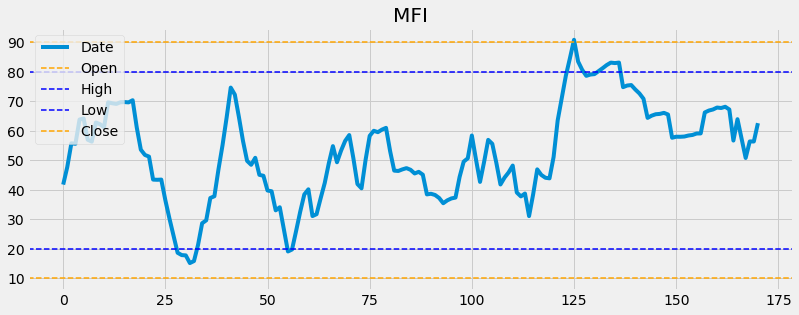

In [ ]:
# Visually plot the MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi

#Create plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle='--', color='orange', linewidth=1.5)
plt.axhline(20, linestyle='--', color='blue', linewidth=1.5)
plt.axhline(80, linestyle='--', color='blue', linewidth=1.5)
plt.axhline(90, linestyle='--', color='orange', linewidth=1.5)
plt.title('MFI')
plt.legend(df.columns.values, loc='upper left')

In [ ]:
# Create new dataframe
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Adj Close,Volume,MFI
2021-03-28,2021-03-28,55974.941406,56610.312500,55071.113281,55950.746094,55950.746094,47686580918,41.787663
2021-03-29,2021-03-29,55947.898438,58342.097656,55139.339844,57750.199219,57750.199219,57625587027,47.743513
2021-03-30,2021-03-30,57750.132813,59447.222656,57251.550781,58917.691406,58917.691406,54414116432,55.772483
2021-03-31,2021-03-31,58930.277344,59930.027344,57726.417969,58918.832031,58918.832031,65520826225,55.626777
2021-04-01,2021-04-01,58926.562500,59586.070313,58505.277344,59095.808594,59095.808594,61669163792,63.840764
...,...,...,...,...,...,...,...,...
2021-09-10,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,39154666597,57.412995
2021-09-11,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245,50.812210
2021-09-12,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,27881980161,56.421893
2021-09-13,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,40969943253,56.396447


In [ ]:
# Create function for buy/sell signals
# def get_signal(data, high, low):
#   buy_signal = []
#   sell_signal = []

#   for i in range(0,len(data['MFI'])):
#     if data['MFI'][i] > high:
#       buy_signal.append(np.nan)
#       sell_signal.append(data['Close'][i])
#     elif data['MFI'][i] < low:
#       buy_signal.append(data['Close'][i])
#       sell_signal.append(np.nan)
#     else:
#       buy_signal.append(np.nan)
#       sell_signal.append(np.nan)

#     return(buy_signal, sell_signal)

def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
    # print(buy_signal, sell_signal)
 
    

In [ ]:
# Add new colums (Buy & Sell). 
# Enter dataframe, high level and low level into function.
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
# new_df['Sell'] = get_signal(new_df, 80, 20)

# Show the data
# new_df

TypeError: ignored